<a href="https://colab.research.google.com/github/AnirbanMukherjeeXD/cnn-mnist-digits/blob/master/ann_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [3]:
mnist = keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) =  mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


5


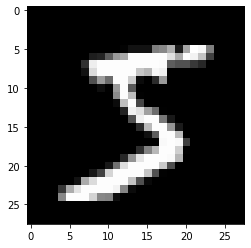

In [4]:
plt.gray()
plt.imshow(train_images[0])
print(train_labels[0])

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',    
              loss='categorical_crossentropy',    
              metrics=['accuracy'])

In [25]:
history=model.fit(train_images, train_labels, epochs=20, validation_split=0.2,)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 97us/sample - loss: 0.2906 - accuracy: 0.9181 - val_loss: 0.1587 - val_accuracy: 0.9554
Epoch 2/20
48000/48000 [==============================] - 4s 88us/sample - loss: 0.1280 - accuracy: 0.9620 - val_loss: 0.1202 - val_accuracy: 0.9643
Epoch 3/20
48000/48000 [==============================] - 4s 90us/sample - loss: 0.0877 - accuracy: 0.9752 - val_loss: 0.0952 - val_accuracy: 0.9712
Epoch 4/20
48000/48000 [==============================] - 4s 93us/sample - loss: 0.0664 - accuracy: 0.9798 - val_loss: 0.0932 - val_accuracy: 0.9709
Epoch 5/20
48000/48000 [==============================] - 4s 91us/sample - loss: 0.0505 - accuracy: 0.9844 - val_loss: 0.0883 - val_accuracy: 0.9747
Epoch 6/20
48000/48000 [==============================] - 4s 92us/sample - loss: 0.0391 - accuracy: 0.9884 - val_loss: 0.0885 - val_accuracy: 0.9745
Epoch 7/20
48000/48000 [==============================] 

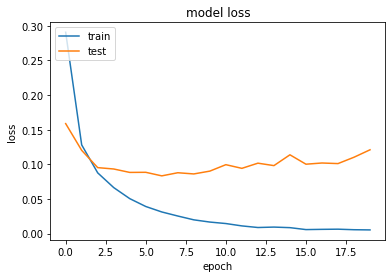

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()